<a href="https://colab.research.google.com/github/superbunny38/Projects/blob/main/PhotoRestoration/Test_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test **our own images** with pretrained model

##Cloning from github

In [ ]:
!git clone https://github.com/sofiavegaz/Bringing-Old-Photos-Back-to-Life.git photo_restoration

Cloning into 'photo_restoration'...
remote: Enumerating objects: 536, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 536 (delta 116), reused 120 (delta 63), pack-reused 314
Receiving objects: 100% (536/536), 44.86 MiB | 35.75 MiB/s, done.
Resolving deltas: 100% (232/232), done.


##Installing requisites

In [ ]:
%cd photo_restoration/Face_Enhancement/models/networks/
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../../

%cd Global/detection_models
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../

%cd Face_Detection/
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
%cd ../

%cd Face_Enhancement/
!wget https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life/releases/download/v1.0/face_checkpoints.zip
!unzip face_checkpoints.zip
%cd ../
%cd Global/
!wget https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life/releases/download/v1.0/global_checkpoints.zip
!unzip global_checkpoints.zip
%cd ../
%cd ..
!ls

/content/photo_restoration/Face_Enhancement/models/networks
Cloning into 'Synchronized-BatchNorm-PyTorch'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 188 (delta 10), reused 27 (delta 10), pack-reused 161
Receiving objects: 100% (188/188), 47.20 KiB | 1.75 MiB/s, done.
Resolving deltas: 100% (106/106), done.
/content/photo_restoration
/content/photo_restoration/Global/detection_models
Cloning into 'Synchronized-BatchNorm-PyTorch'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 188 (delta 10), reused 27 (delta 10), pack-reused 161
Receiving objects: 100% (188/188), 47.20 KiB | 1006.00 KiB/s, done.
Resolving deltas: 100% (106/106), done.
/content/photo_restoration
/content/photo_restoration/Face_Detection
--2021-12-02 03:45:31--  http://dlib.net/files/shape_predictor_68_face_landm

requirements:
- torch
- torchvision
- dlib
- scikit-image
- easydict
- PyYAML
- dominate>=2.3.1
- dill
- tensorboardX
- scipy
- opencv-python
- einops
- PySimpleGUI

In [ ]:
!pip install -r photo_restoration/requirements.txt

     |████████████████████████████████| 124 kB 6.3 MB/s 
     |████████████████████████████████| 394 kB 22.7 MB/s 


##Getting input from drive

To access the inputs we used for this project, click this link to have the same folders shared

https://drive.google.com/drive/folders/1cIWr9GOWB4UnnF83xu0SnKSKvlM7Itqw?usp=sharing

And then create a direct access to the folder IDL_final_project from MyDrive

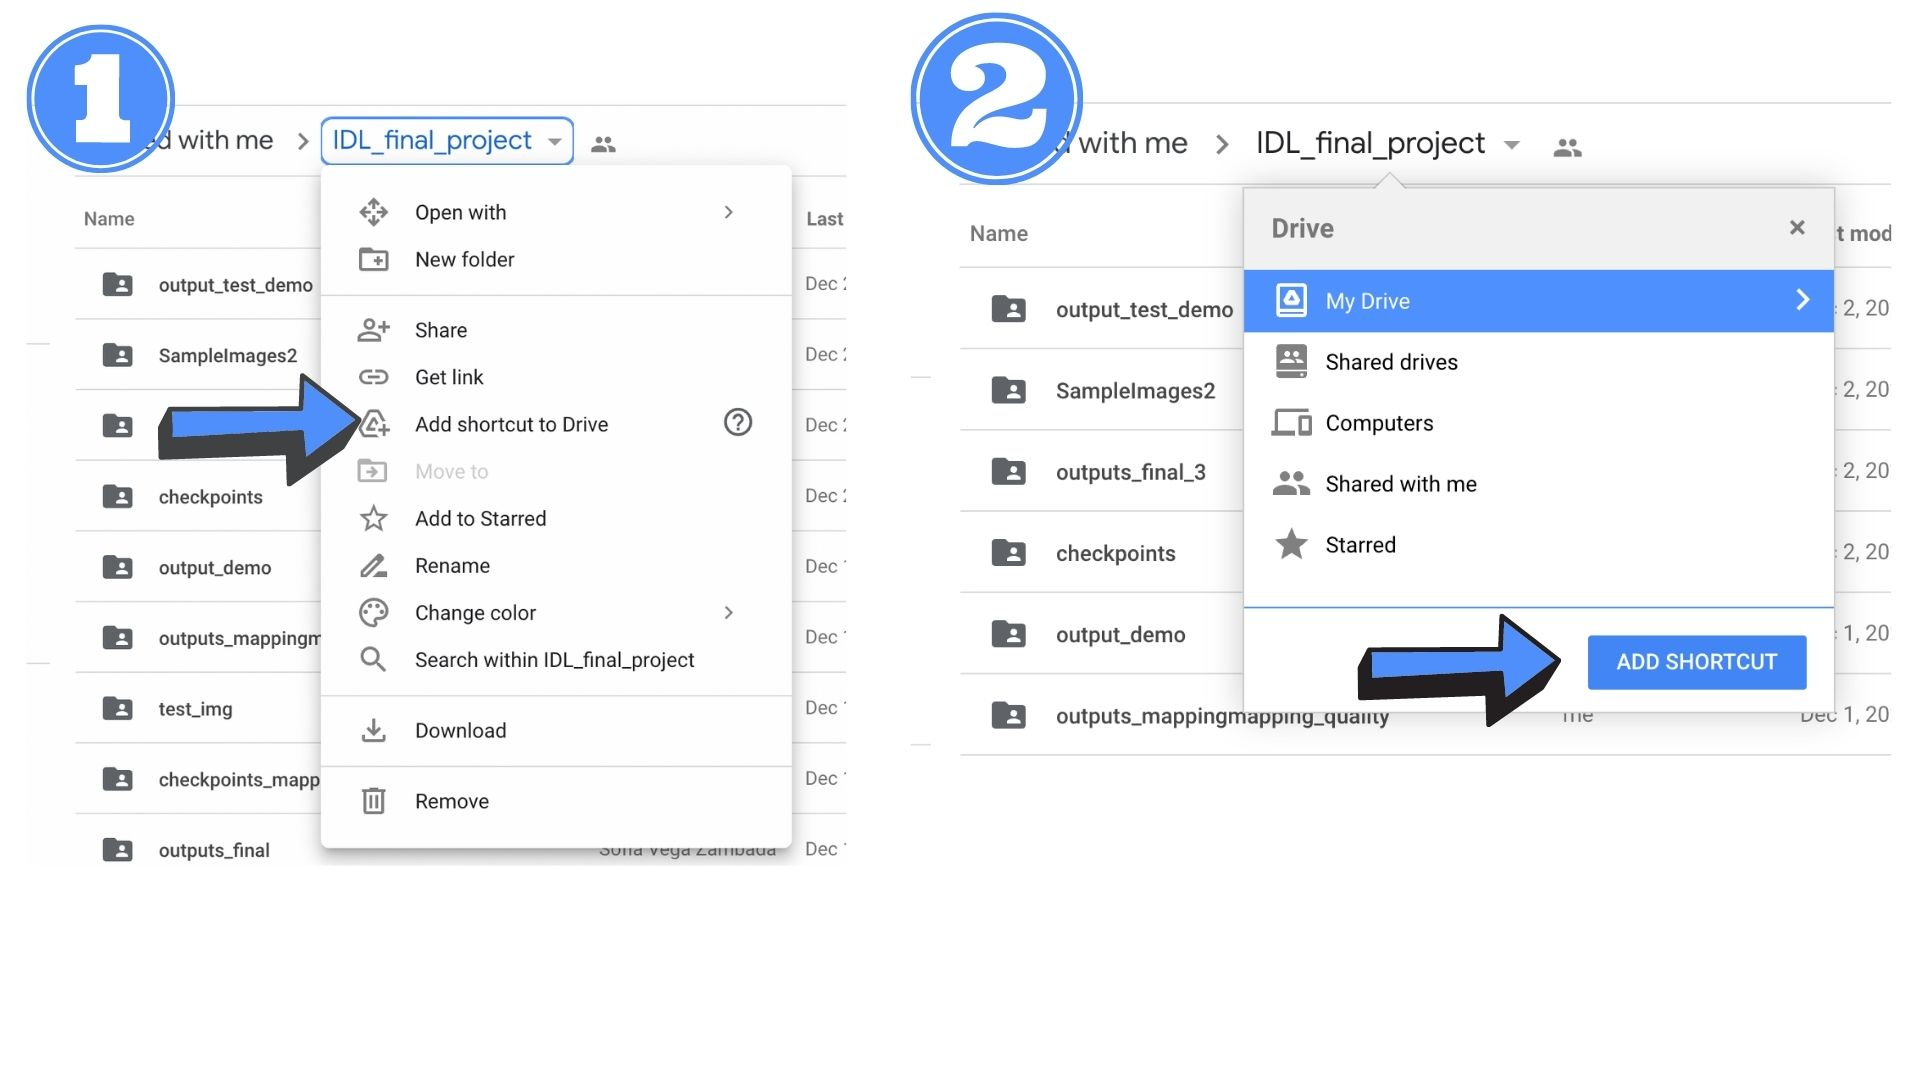

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Restoring our own images!
## Images of my grandparents :D

In [ ]:
!rm -r /content/drive/MyDrive/IDL_final_project/output_test_demo
%cd /content/photo_restoration/

input_folder = "/content/drive/MyDrive/IDL_final_project/SampleImages2"
output_folder = "/content/drive/MyDrive/IDL_final_project/output_test_demo"

import os
basepath = os.getcwd()
input_path = os.path.join(basepath, input_folder)
output_path = os.path.join(basepath, output_folder)
os.mkdir(output_path)

!python run.py --input_folder /content/drive/MyDrive/IDL_final_project/SampleImages2 --output_folder /content/drive/MyDrive/IDL_final_project/output_test_demo --GPU 0

/content/photo_restoration
Running Stage 1: Overall restoration
Mapping: You are using the mapping model without global restoration.
Now you are processing KakaoTalk_20211109_143730604.jpg
Now you are processing KakaoTalk_20211109_143730604_01.jpg
Now you are processing KakaoTalk_20211109_143730604_02.jpg
Now you are processing KakaoTalk_20211109_143730604_03.jpg
Finish Stage 1 ...


Running Stage 2: Face Detection
1
2
1
Finish Stage 2 ...


Running Stage 3: Face Enhancement
The main GPU is 
0
dataset [FaceTestDataset] of size 4 was created
The size of the latent vector size is [8,8]
Network [SPADEGenerator] was created. Total number of parameters: 92.1 million. To see the architecture, do print(network).
hi :)
Finish Stage 3 ...


Running Stage 4: Blending
Finish Stage 4 ...


All the processing is done. Please check the results.


In [ ]:
import io
import IPython.display
import numpy as np
import PIL.Image
import os

def imshow(a, format='png', jpeg_fallback=True):
    a = np.asarray(a, dtype=np.uint8)
    data = io.BytesIO()
    PIL.Image.fromarray(a).save(data, format)
    im_data = data.getvalue()
    try:
      disp = IPython.display.display(IPython.display.Image(im_data))
    except IOError:
      if jpeg_fallback and format != 'jpeg':
        print(('Warning: image was too large to display in format "{}"; '
              'trying jpeg instead.').format(format))
        return imshow(a, format='jpeg')
      else:
        raise
    return disp

def make_grid(I1, I2, resize=True):
    I1 = np.asarray(I1)
    H, W = I1.shape[0], I1.shape[1]
    
    if I1.ndim >= 3:
        I2 = np.asarray(I2.resize((W,H)))
        I_combine = np.zeros((H,W*2,3))
        I_combine[:,:W,:] = I1[:,:,:3]
        I_combine[:,W:,:] = I2[:,:,:3]
    else:
        I2 = np.asarray(I2.resize((W,H)).convert('L'))
        I_combine = np.zeros((H,W*2))
        I_combine[:,:W] = I1[:,:]
        I_combine[:,W:] = I2[:,:]
    I_combine = PIL.Image.fromarray(np.uint8(I_combine))

    W_base = 600
    if resize:
      ratio = W_base / (W*2)
      H_new = int(H * ratio)
      I_combine = I_combine.resize((W_base, H_new), PIL.Image.LANCZOS)

    return I_combine

In [ ]:
%cd /content

/content


In [ ]:
!cp -r /content/drive/MyDrive/IDL_final_project/output_test_demo/final_output /content/output_demo

# Showing the results from using the model

explanation: the left photo is the original image, and the right image is the restored image by the model

KakaoTalk_20211109_143730604.jpg


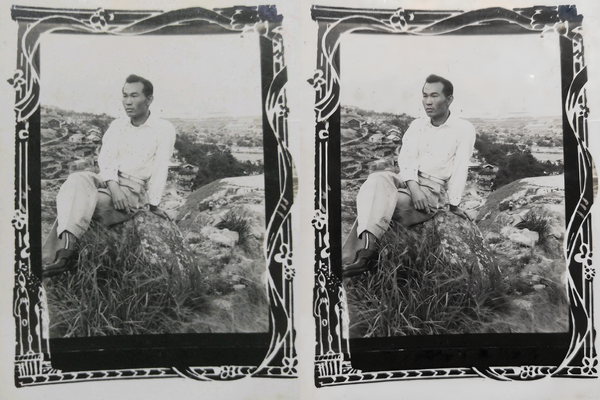

KakaoTalk_20211109_143730604_01.jpg


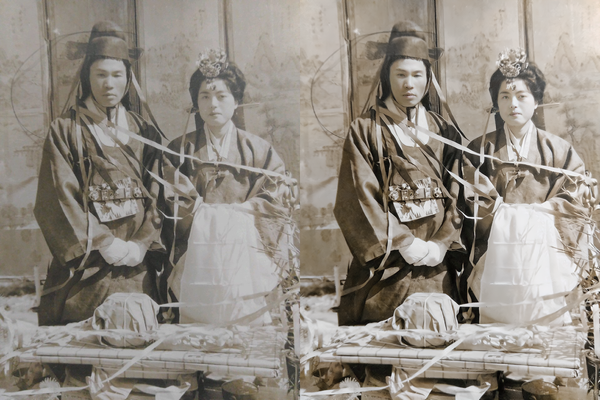

KakaoTalk_20211109_143730604_02.jpg


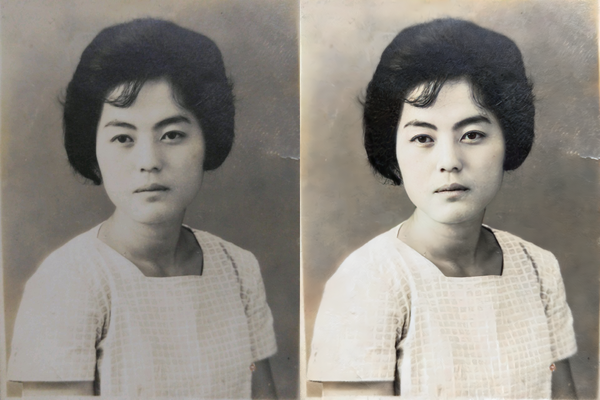

KakaoTalk_20211109_143730604_03.jpg


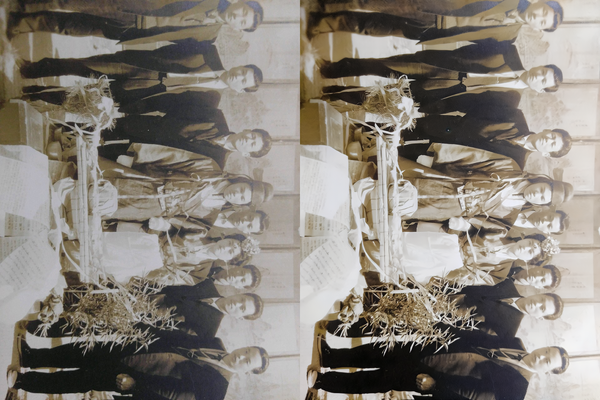

In [ ]:

input_folder = "/content/drive/MyDrive/IDL_final_project/SampleImages2"
output_folder = "/content/drive/MyDrive/IDL_final_project/output_test_demo"

import os
import PIL
basepath = os.getcwd()
input_path = os.path.join(basepath, input_folder)
output_path = os.path.join(basepath, output_folder)
filenames = os.listdir(os.path.join(input_path))
filenames.sort()

input_path = "/content/drive/MyDrive/IDL_final_project/SampleImages2"
output_path = "/content/output_demo/"
for filename in filenames:
    print(filename)
    image_original = PIL.Image.open(os.path.join(input_path, filename))
    filepng = filename[:-3] + "png"
    image_restore = PIL.Image.open(os.path.join(output_path, filepng))

    display(make_grid(image_original, image_restore))

**Insights from testing the model:**

We tested the models on 3 types of images: images with one or two people, images with large number of people, images of landscape.

1. The model worked better on less number of people, compared to groups of people.
2. The model worked better on images of humans, than landscape images.

Below are the captured outputs of different testing images

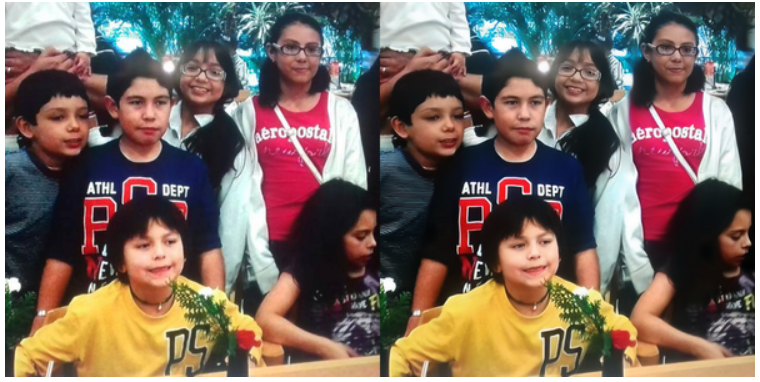

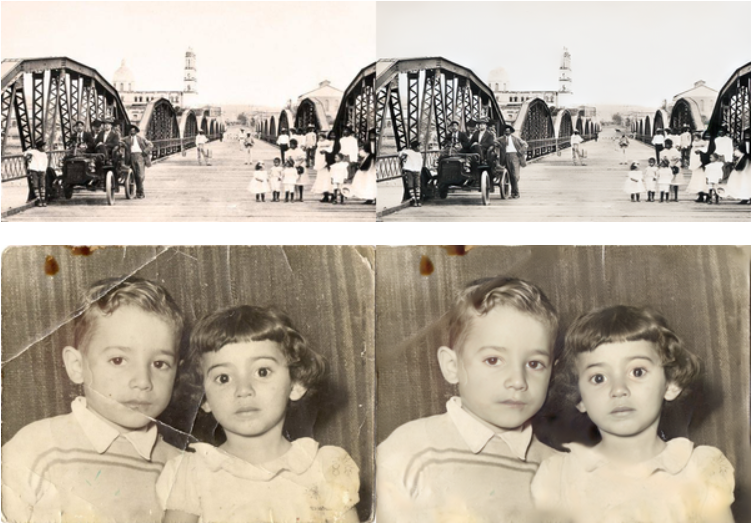